In [ ]:
#loading the libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/CarPrice_project.csv')

In [ ]:
#first look

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe(include = 'all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
#find whether there are duplicate values

print(len(df[df.duplicated()]))

0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='Density'>

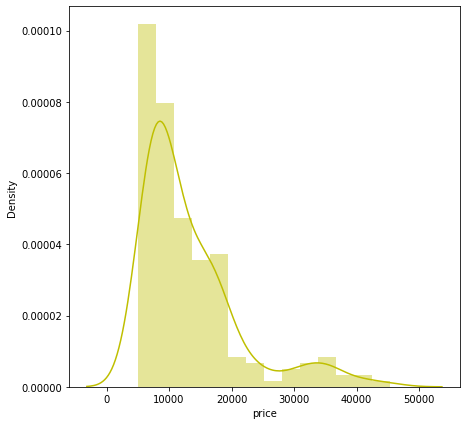

In [ ]:
plt.figure(figsize = (7,7))
sns.distplot(df['price'], color = 'y')

<AxesSubplot:xlabel='price', ylabel='Density'>

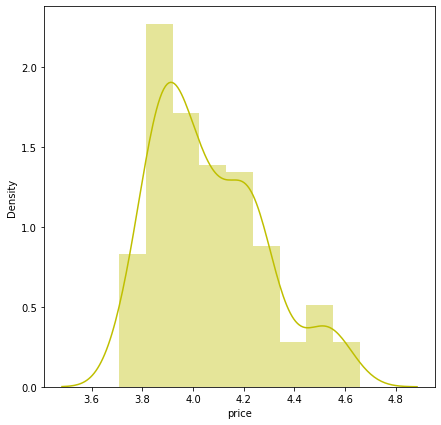

In [ ]:
#log transformation
plt.figure(figsize = (7,7))
sns.distplot(np.log10(df['price']), color ='y')

<AxesSubplot:xlabel='price', ylabel='Density'>

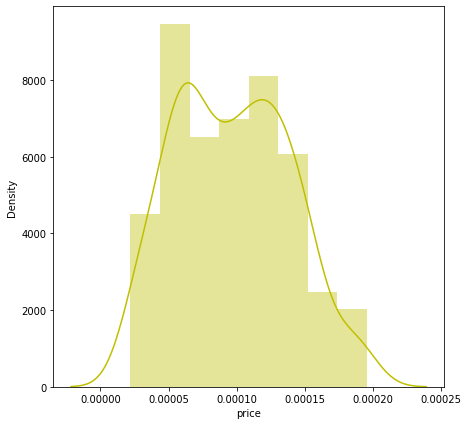

In [ ]:
#inverse transformation

plt.figure(figsize=(7,7))
sns.distplot(np.reciprocal(df['price']), color = 'y')

In [ ]:
#numeric features

numeric_features = df.describe().columns

numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

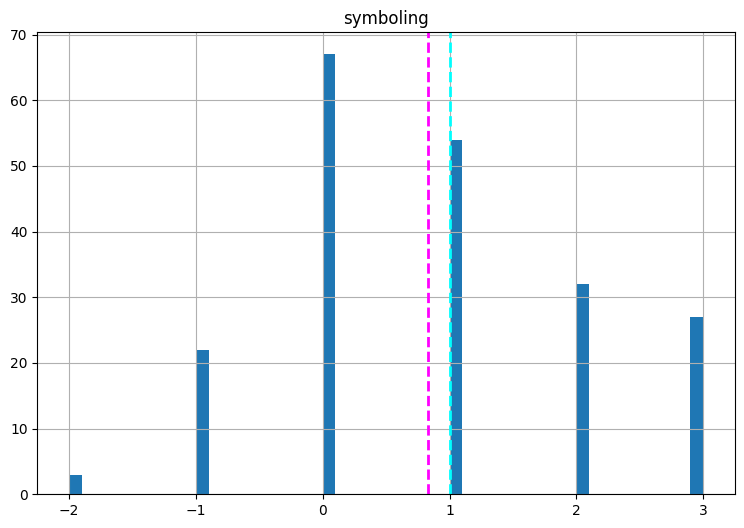

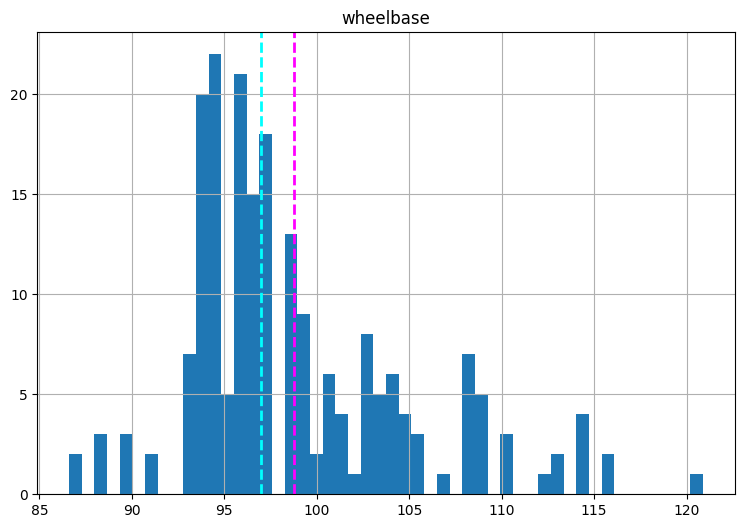

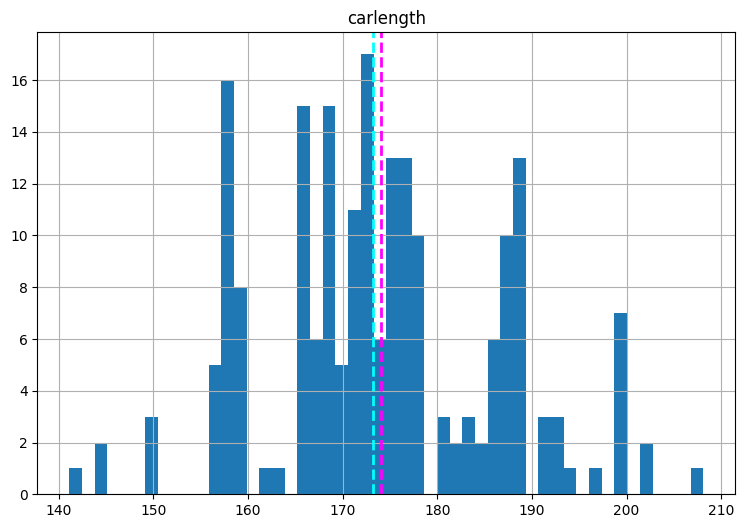

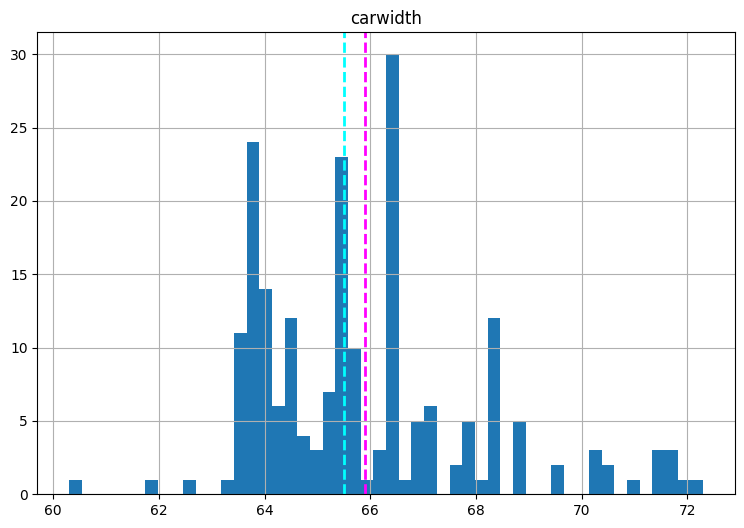

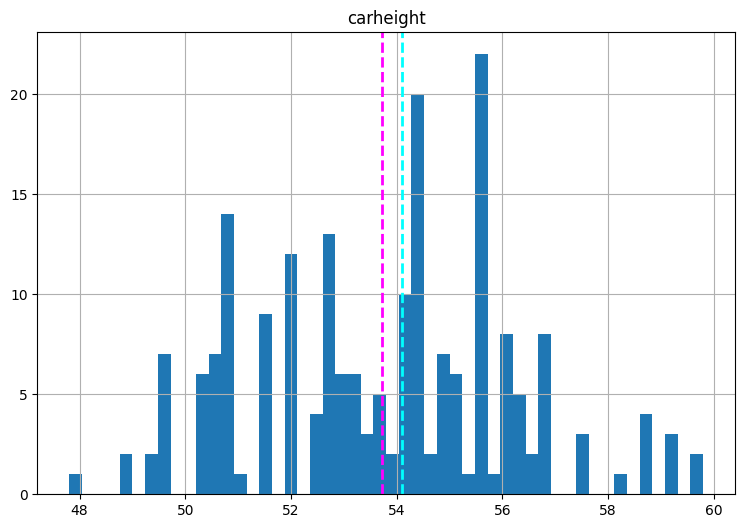

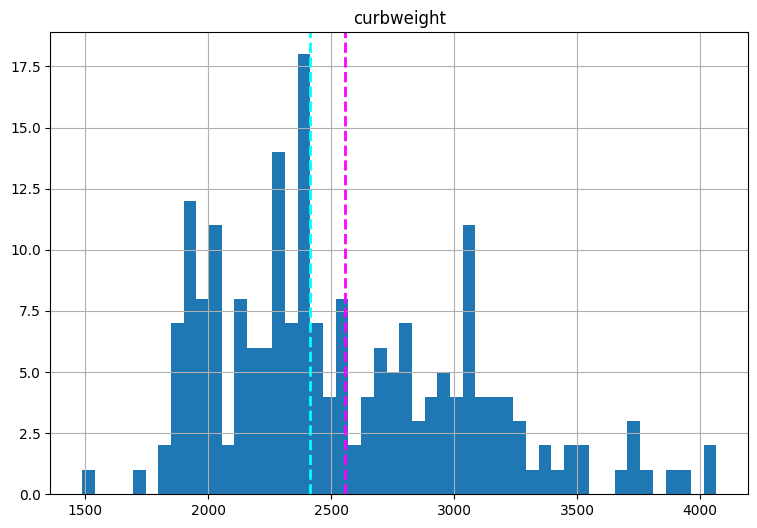

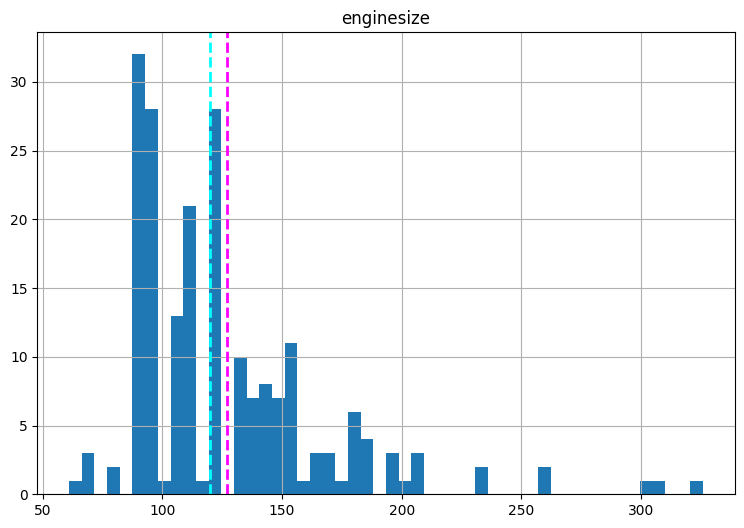

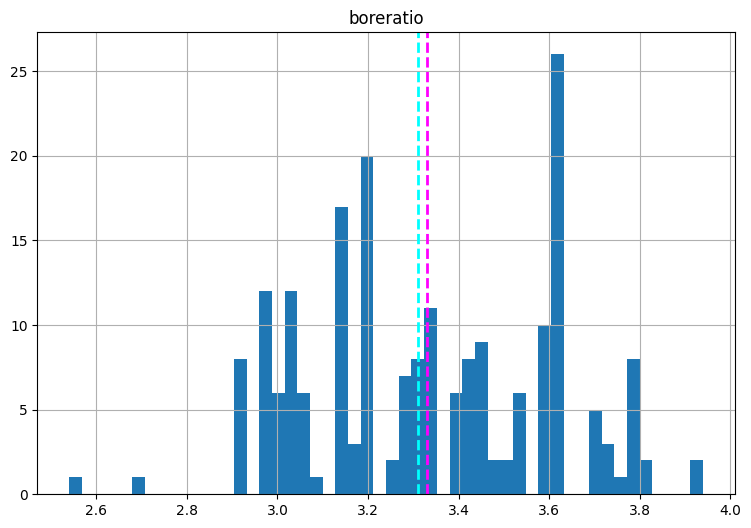

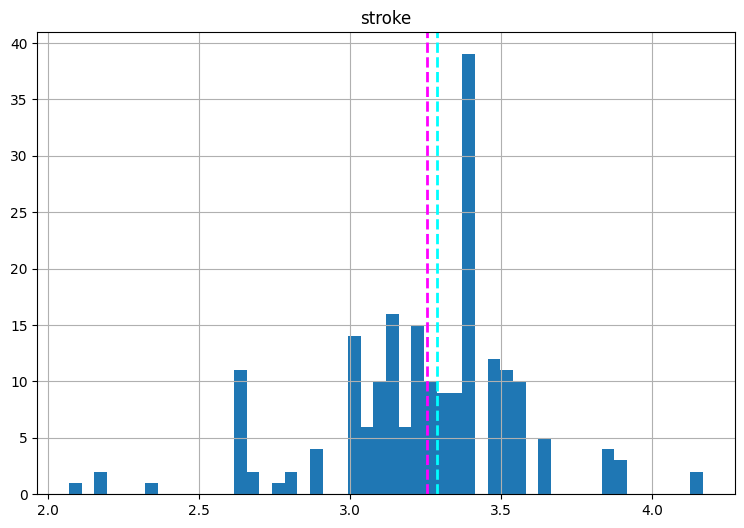

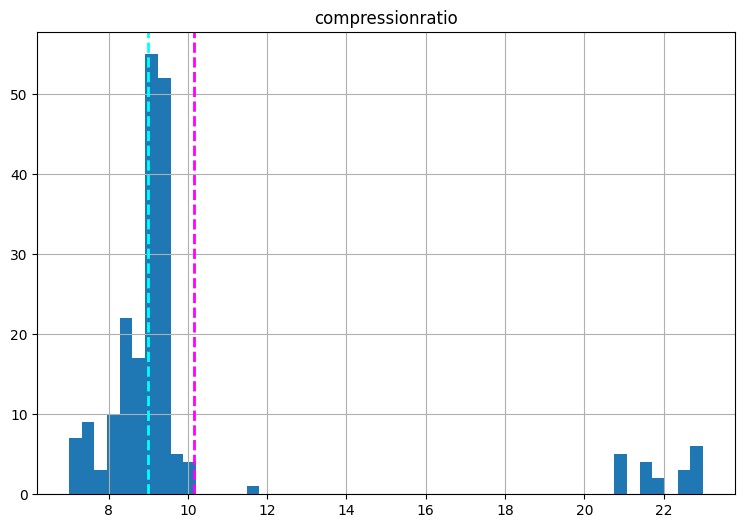

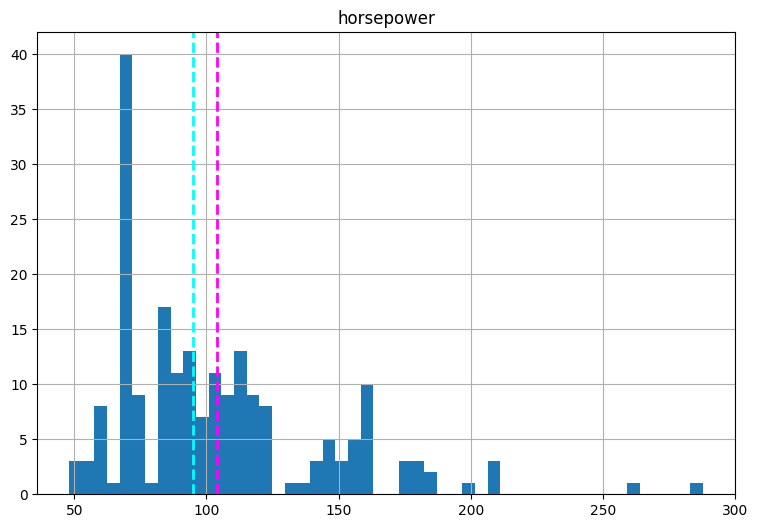

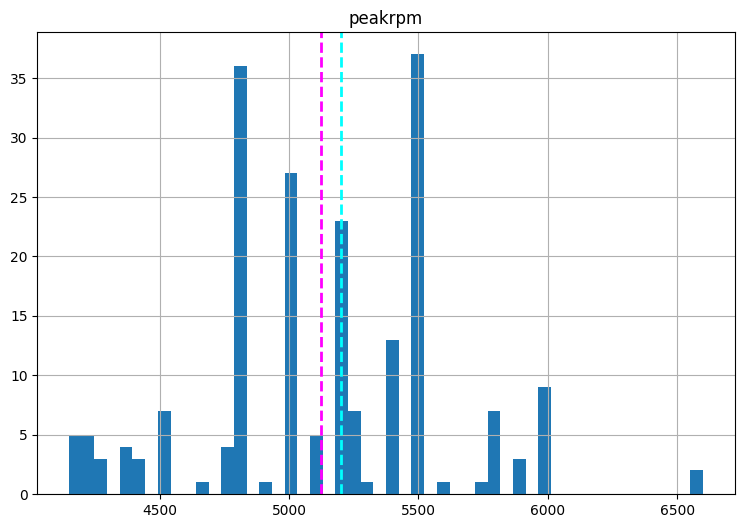

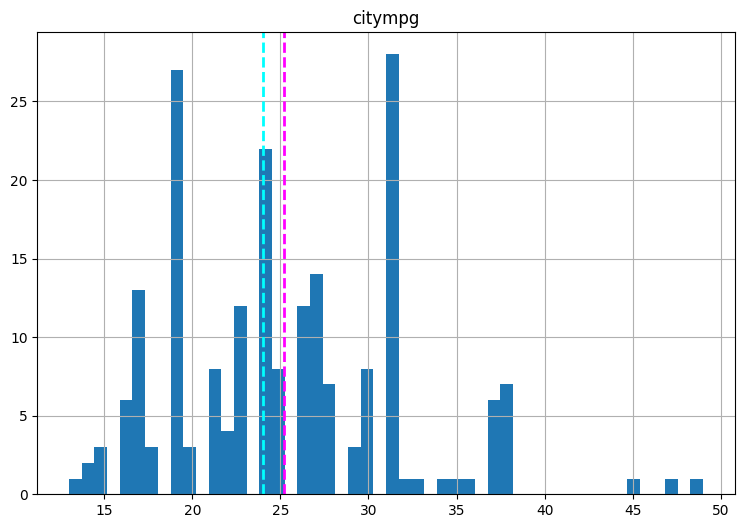

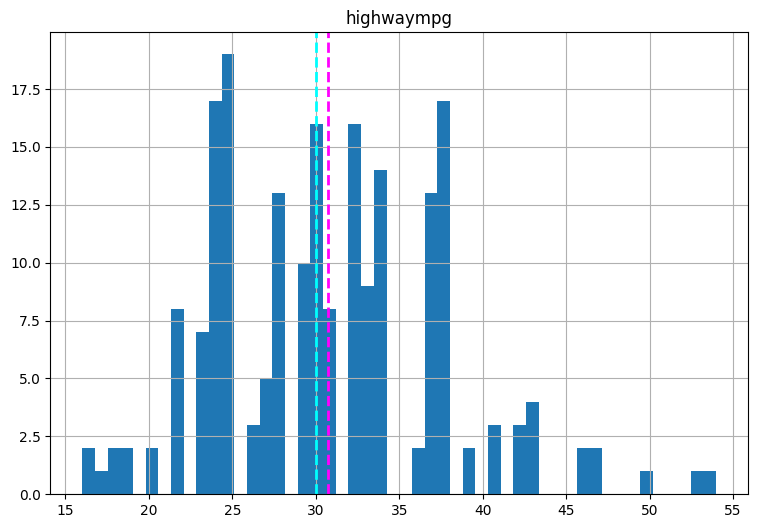

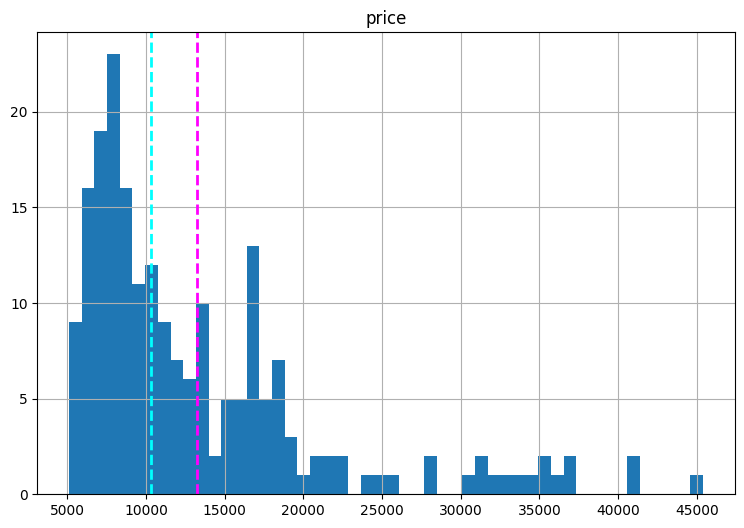

In [ ]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth =2)
  ax.axvline(feature.median(), color = 'cyan', linestyle = 'dashed', linewidth =2)
  ax.set_title(col)
plt.show()

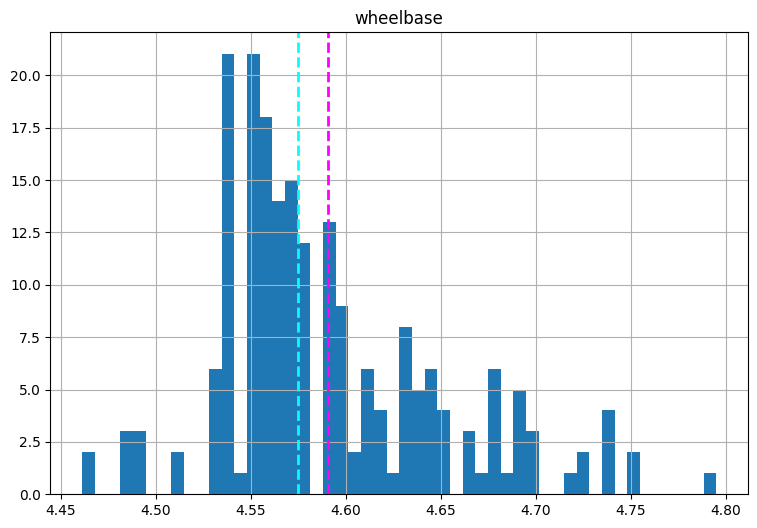

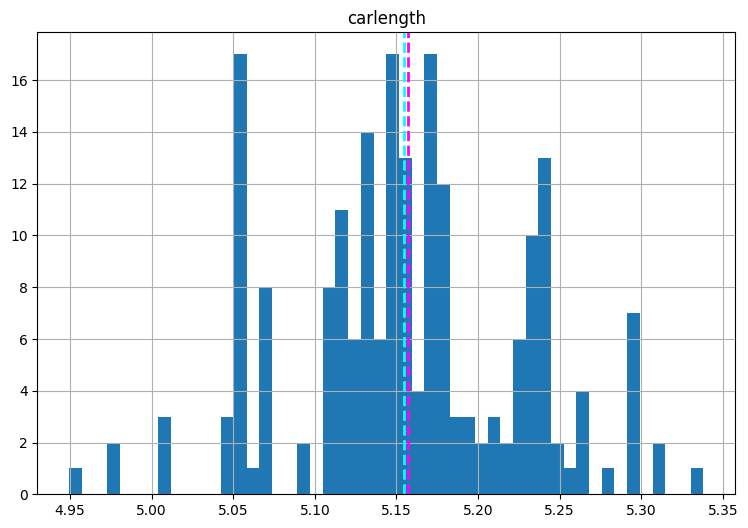

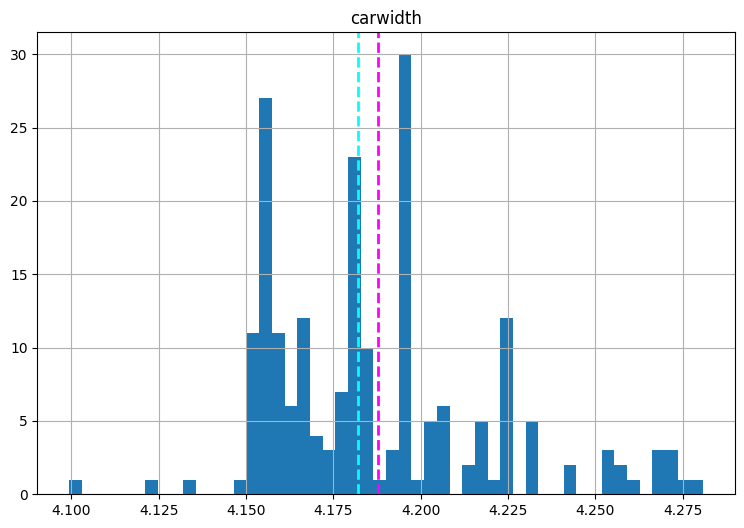

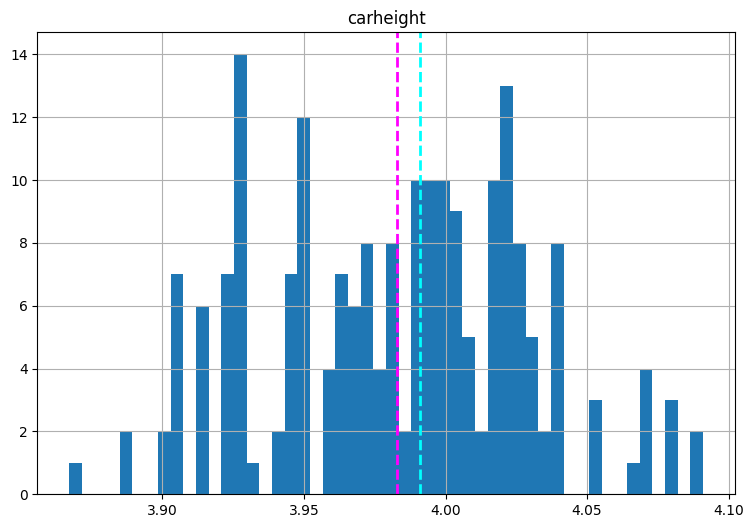

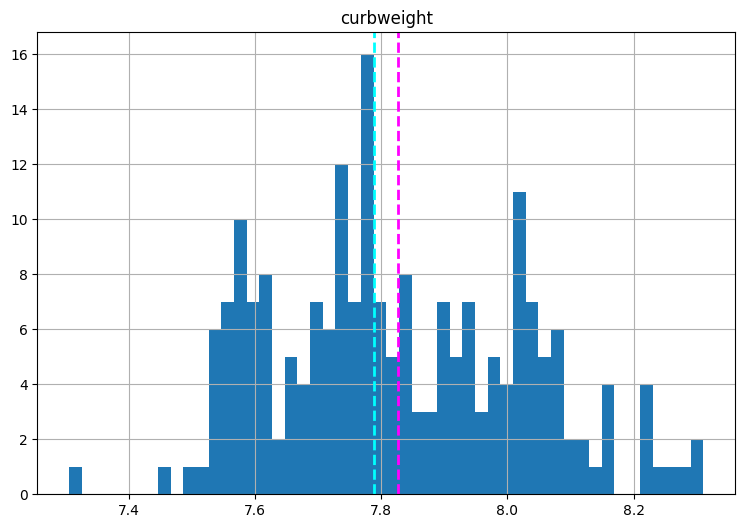

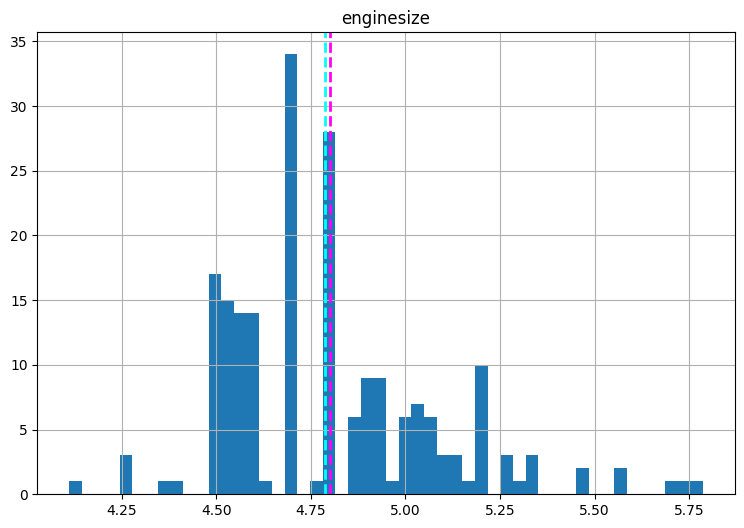

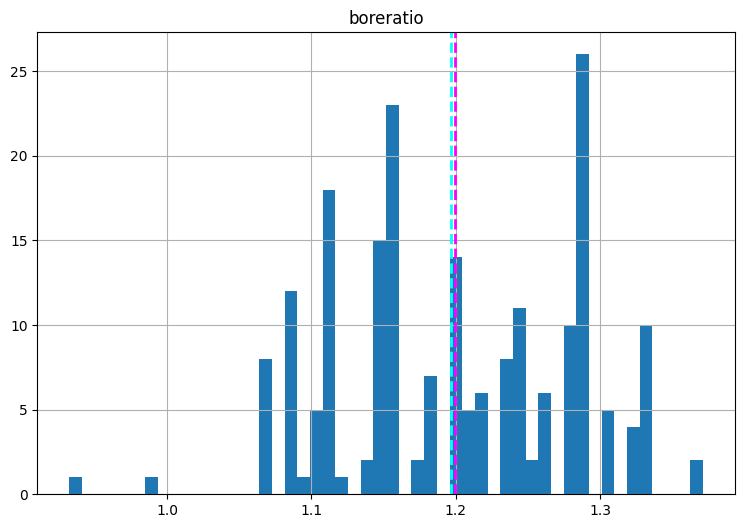

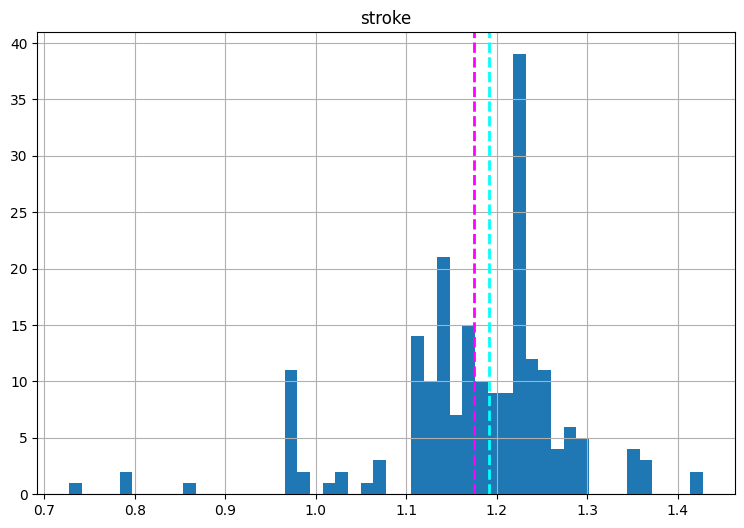

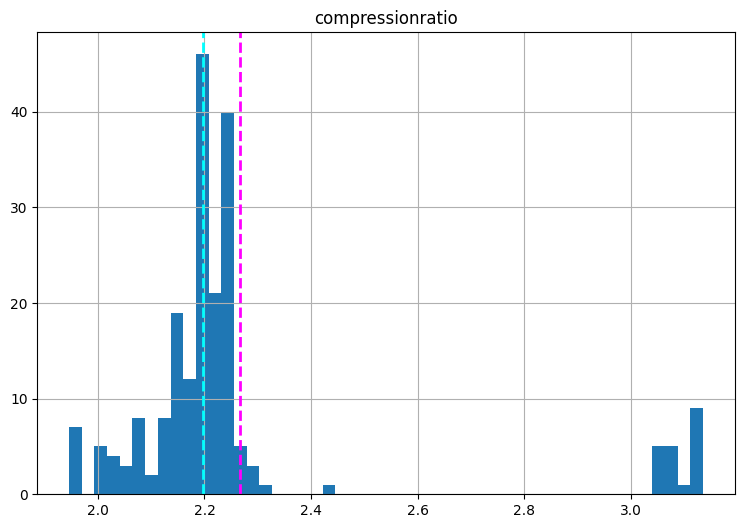

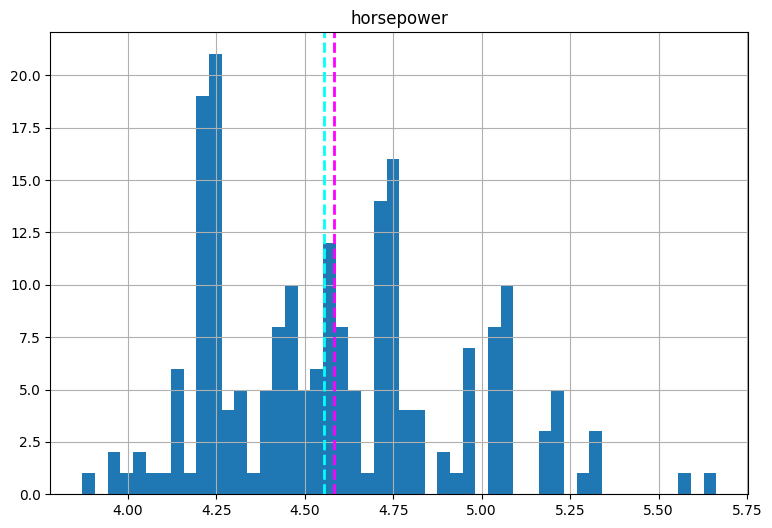

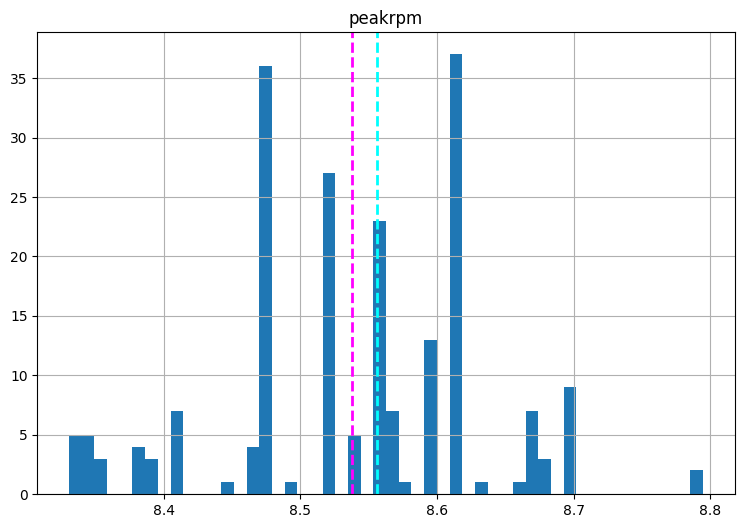

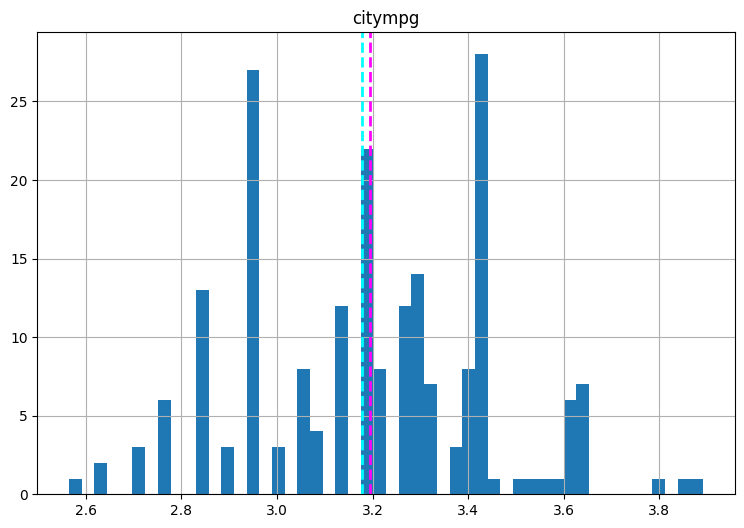

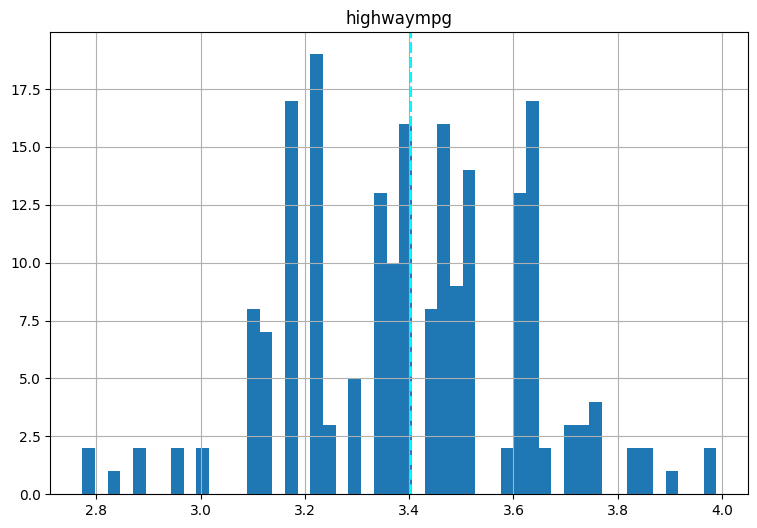

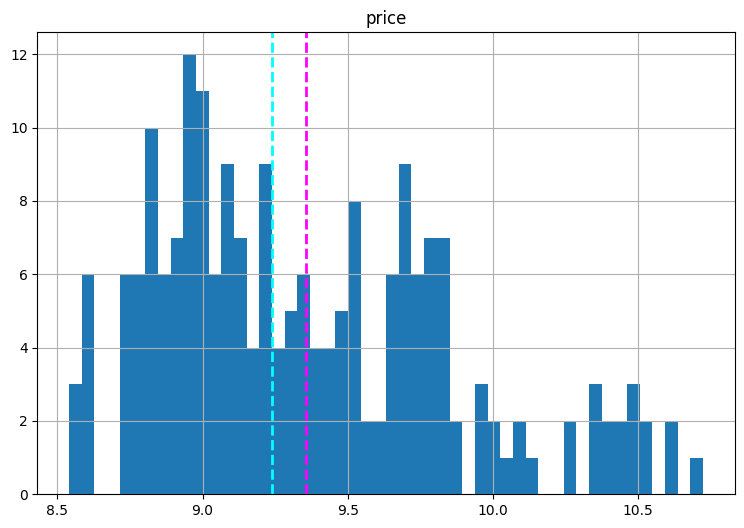

In [ ]:
for col in numeric_features[2:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = np.log(df[col])
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth =2)
  ax.axvline(feature.median(), color = 'cyan', linestyle = 'dashed', linewidth =2)
  ax.set_title(col)
plt.show()

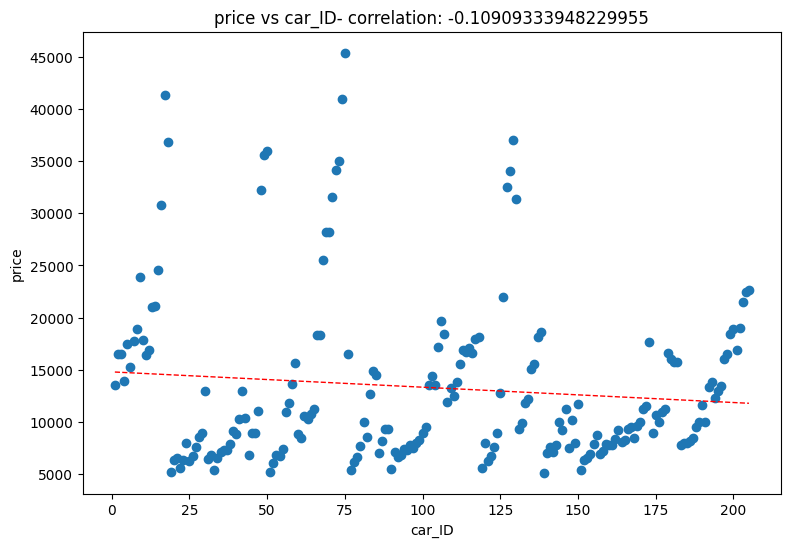

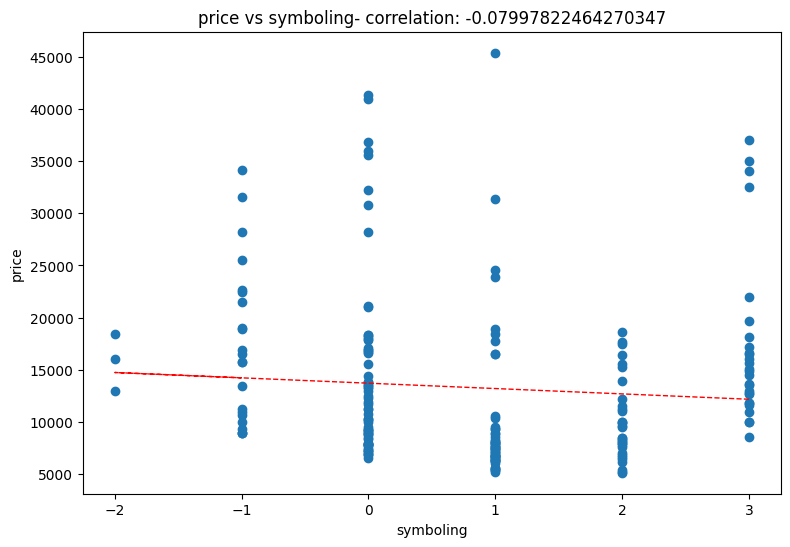

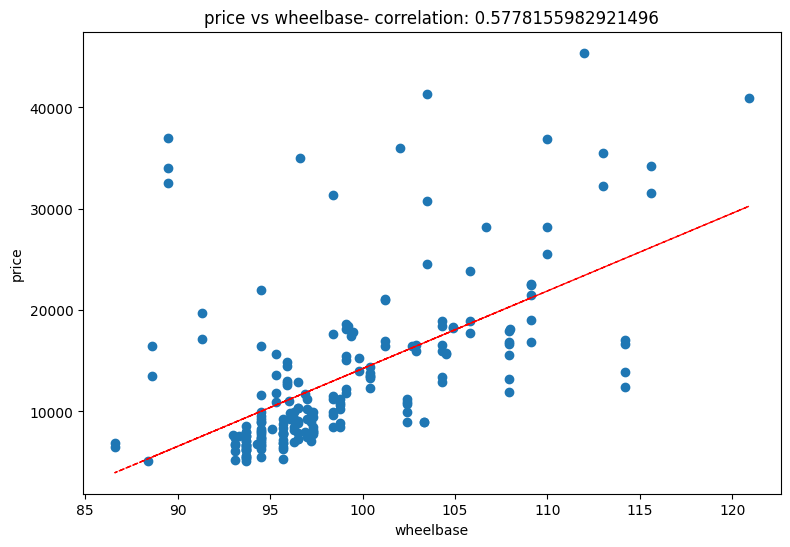

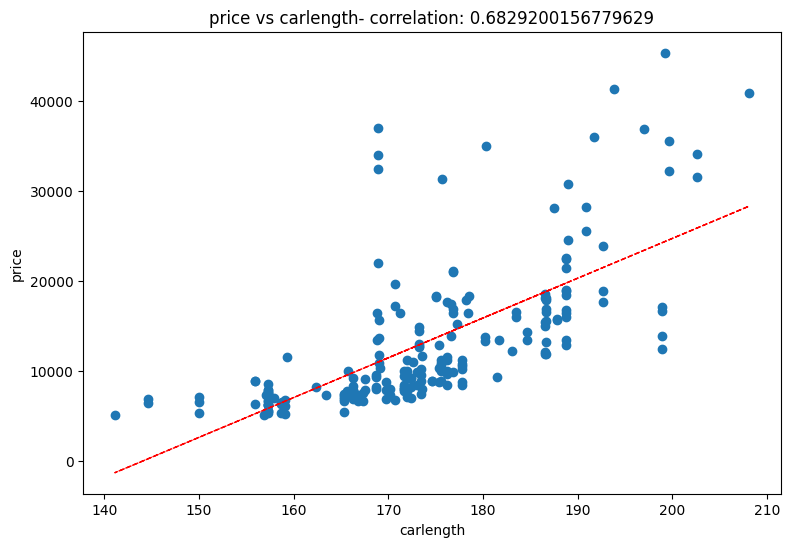

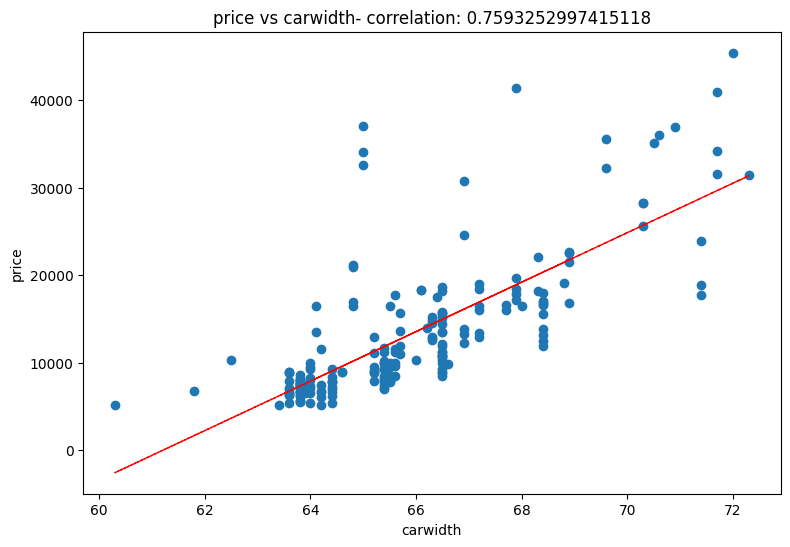

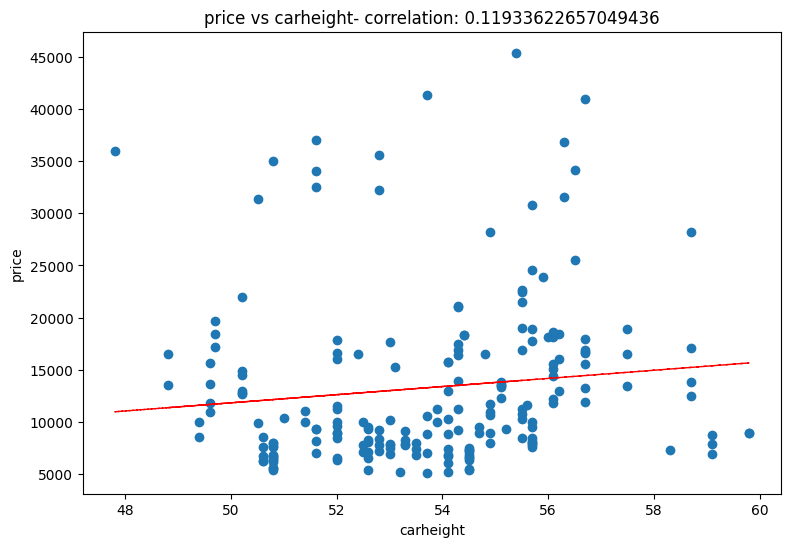

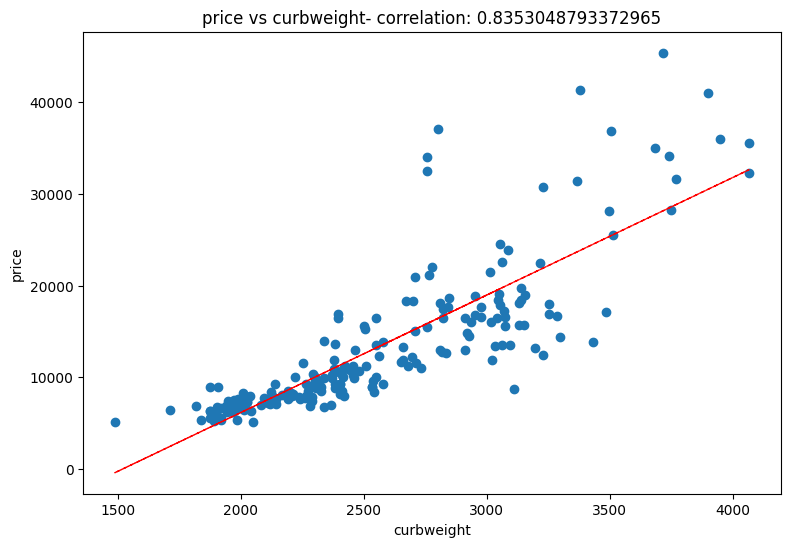

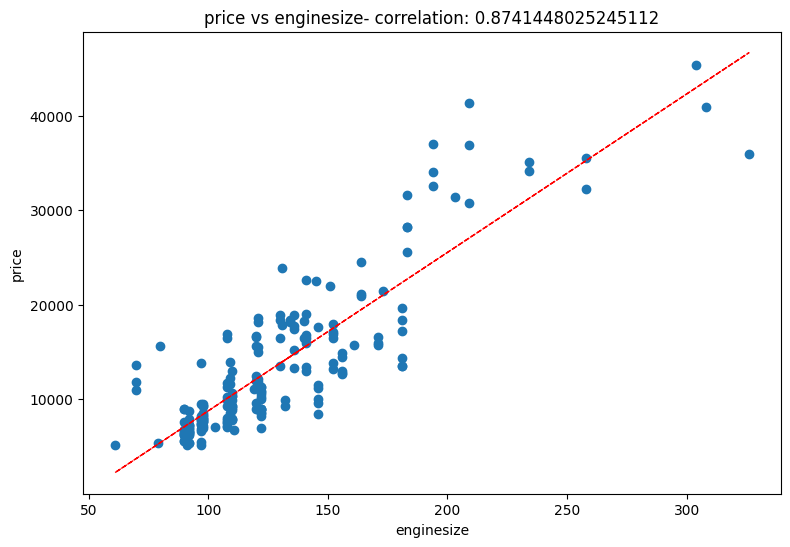

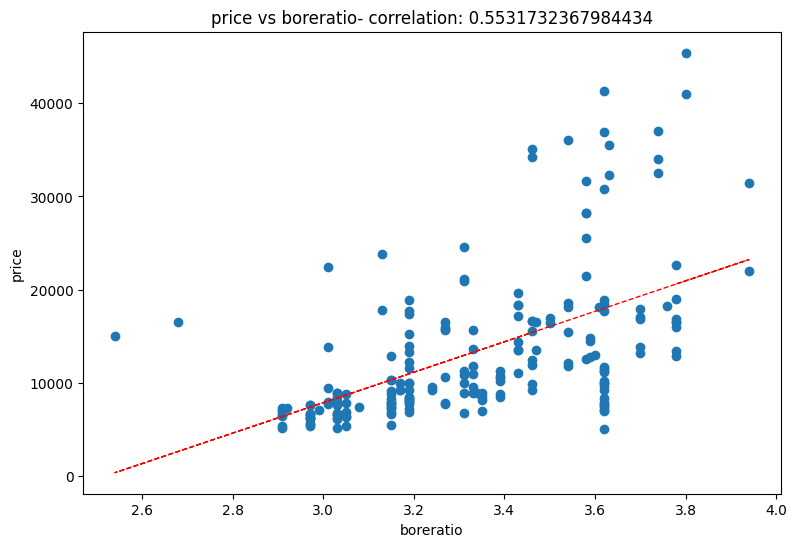

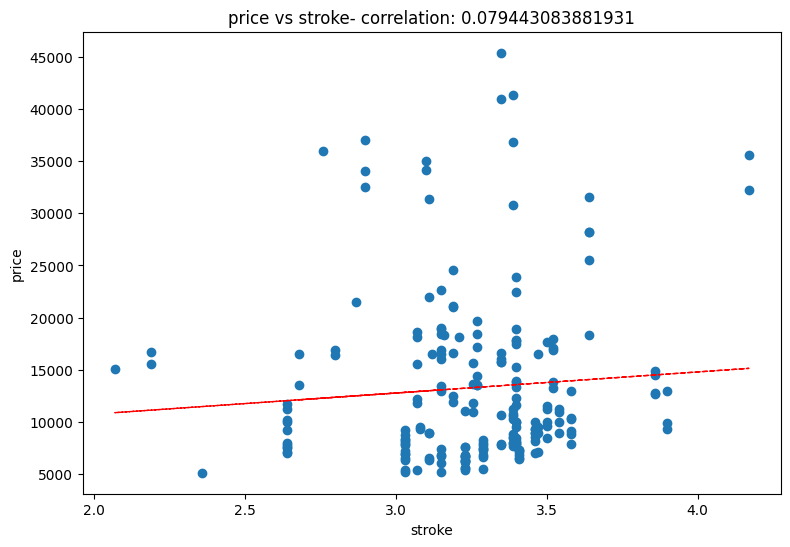

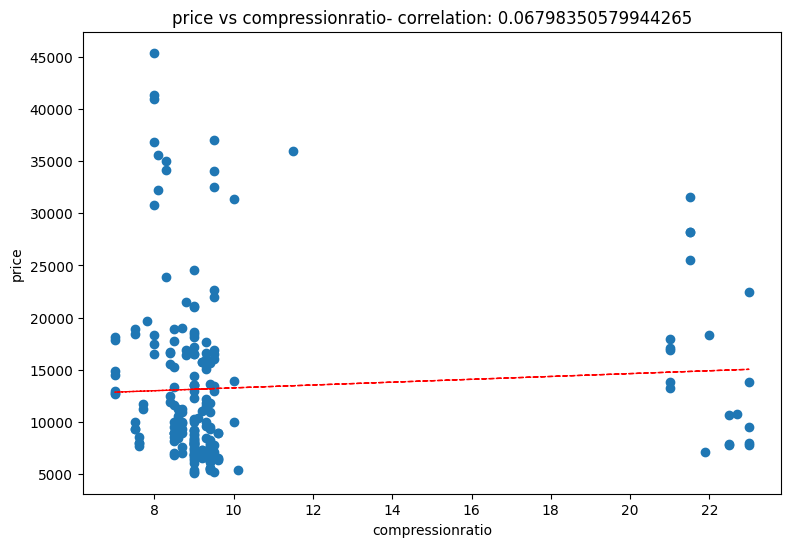

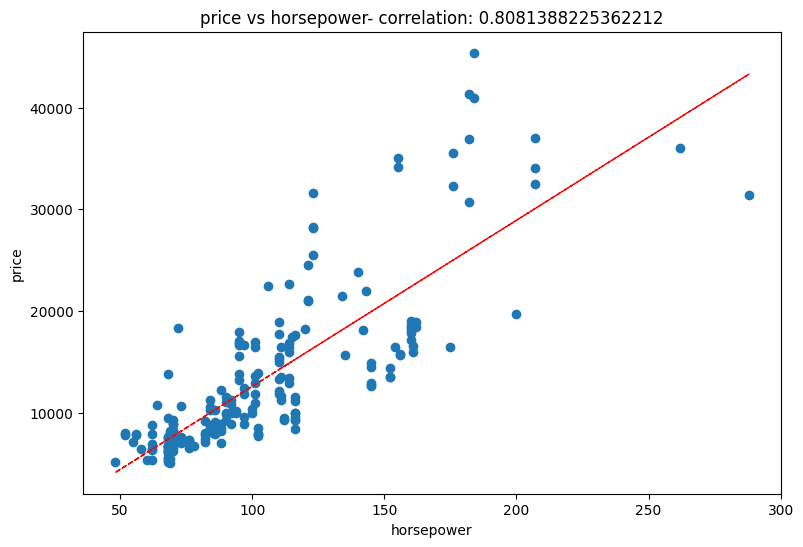

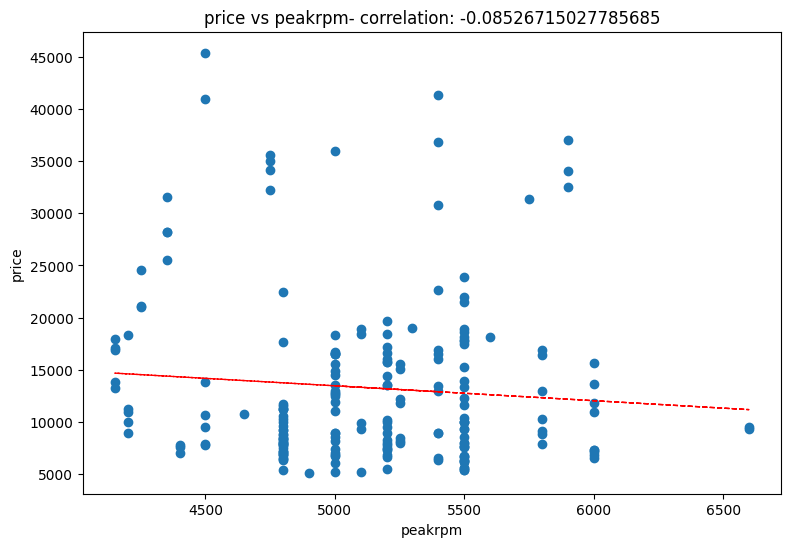

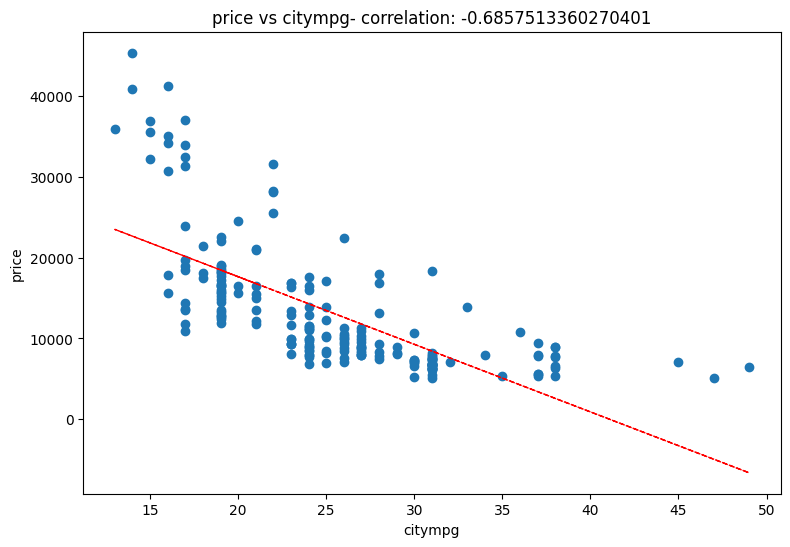

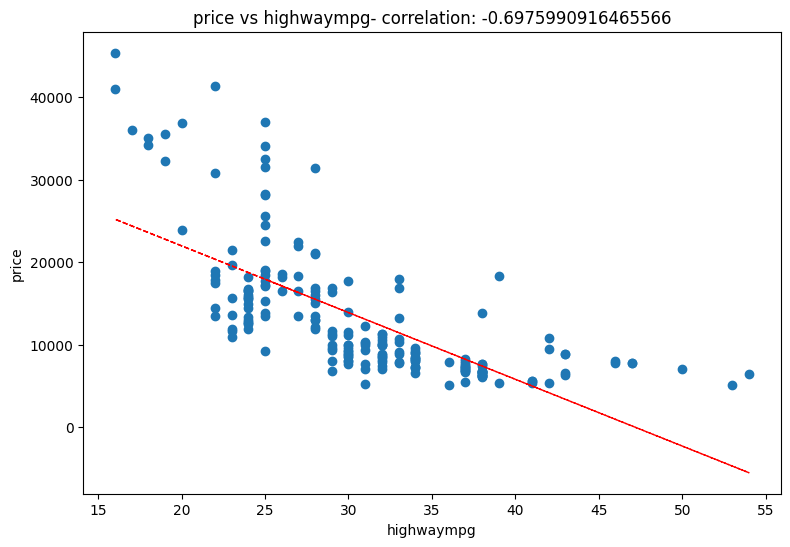

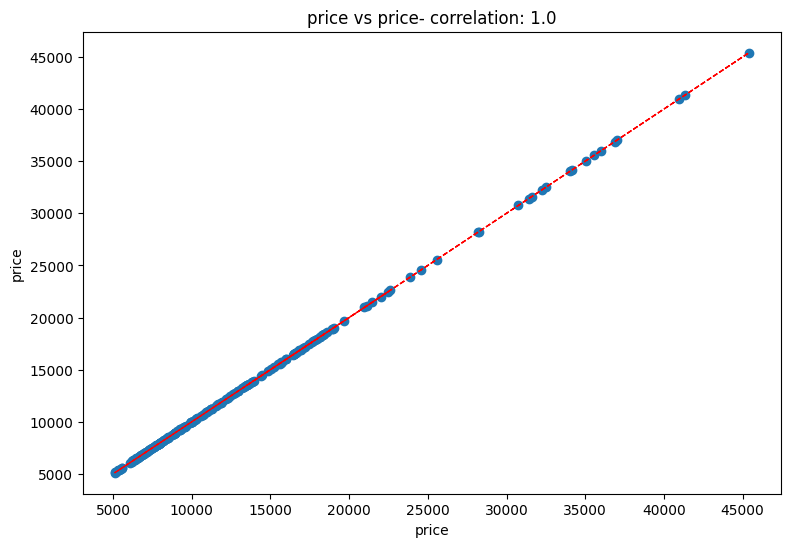

In [ ]:
for col in numeric_features:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = df[col]
  label = df['price']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('price')
  ax.set_title('price vs '+ col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['price'], 1)
  y_hat =  np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw = 1)

plt.show()

<Axes: >

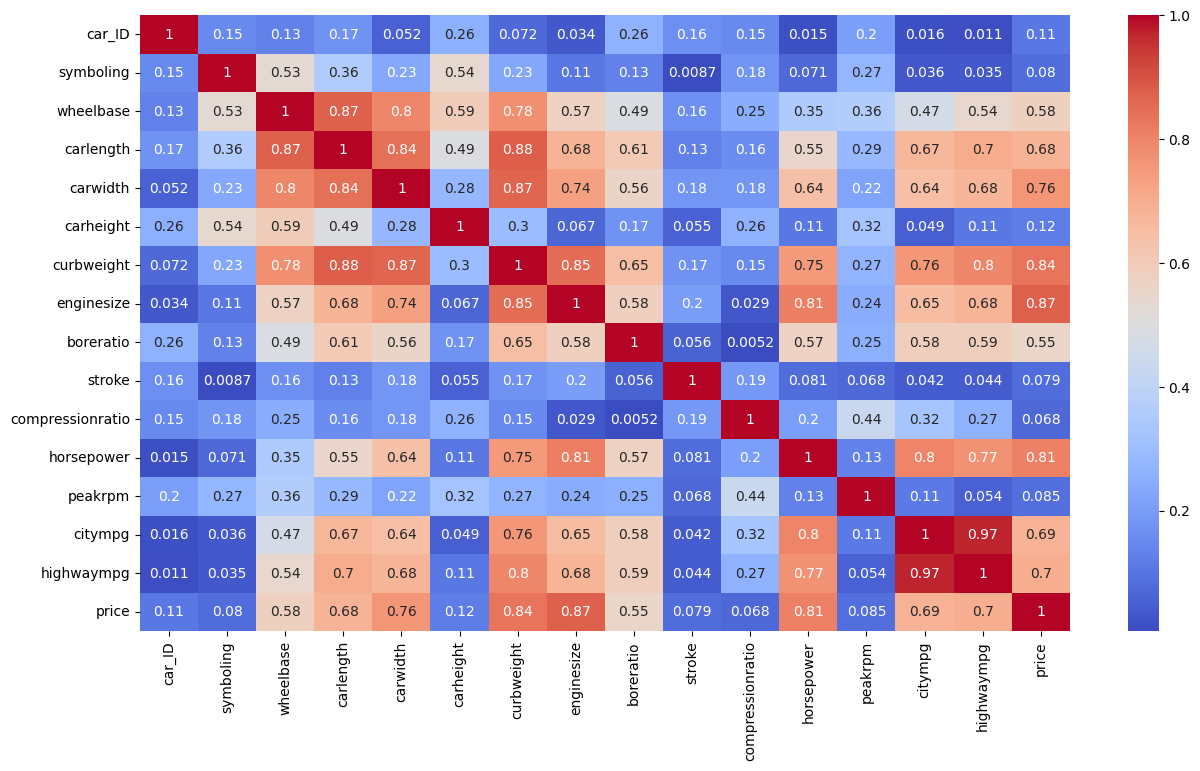

In [ ]:
## correlation graphs

plt.figure(figsize=(15,8))
correlation =  df.corr()
sns.heatmap(abs(correlation), annot = True, cmap ='coolwarm')

In [ ]:
# removing multicolinearity

df['mileage'] = 0.4*df['highwaympg'] + 0.6*df['citympg']
df['car_area'] = df['carlength']*df['carwidth']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price', 'car_ID']]])

,variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price', 'car_ID', 'carlength', 'carwidth', 'citympg', 'highwaympg']]])

,variables,VIF
0,symboling,2.055617
1,wheelbase,1981.325782
2,carheight,825.908353
3,curbweight,406.251907
4,enginesize,67.262383
5,boreratio,261.276569
6,stroke,120.599905
7,compressionratio,15.829665
8,horsepower,58.898896
9,peakrpm,190.656419


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price', 'car_ID', 'carlength', 'carwidth', 'citympg', 'highwaympg','wheelbase','carheight','curbweight','boreratio','stroke','peakrpm','car_area','horsepower']]])

,variables,VIF
0,symboling,1.462763
1,enginesize,5.270022
2,compressionratio,9.391798
3,mileage,8.947241


In [ ]:
numerical_features = ['symboling', 'enginesize','compressionratio','mileage']

In [ ]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
#company name

df['company'] = df['CarName'].str.split(" ", expand = True)[0]
df['company'] = df['company'].replace({'toyouta': 'Toyota', 'vw':'Volkswagen', 'maxda':'Mazda', 'porcshce': 'Porsche'})
df['company'] = df['company'].str.title()
df['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volkswagen     11
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Vokswagen       1
Name: company, dtype: int64

In [ ]:
categorical_features = df.describe(include = ['object', 'category']).columns

In [ ]:
categorical_features

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

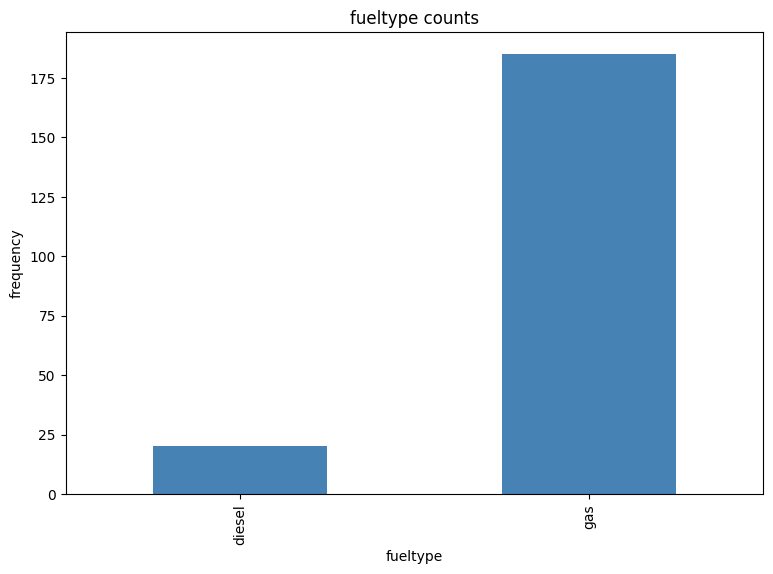

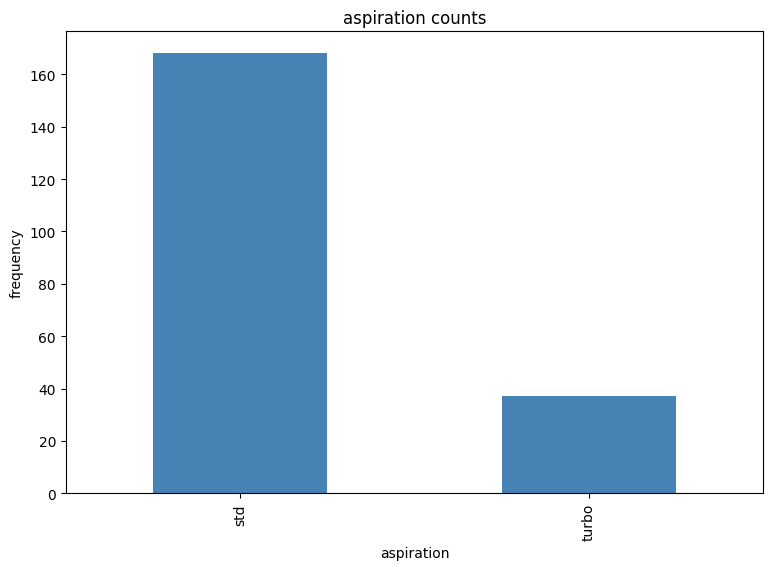

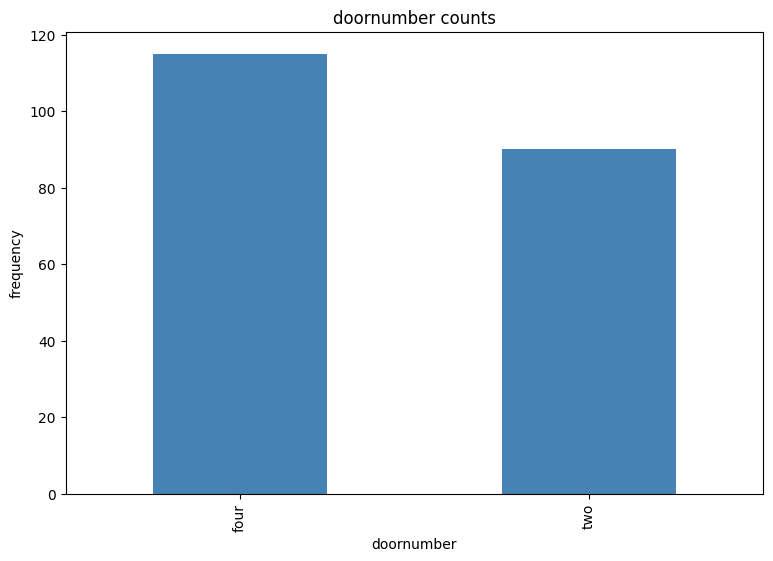

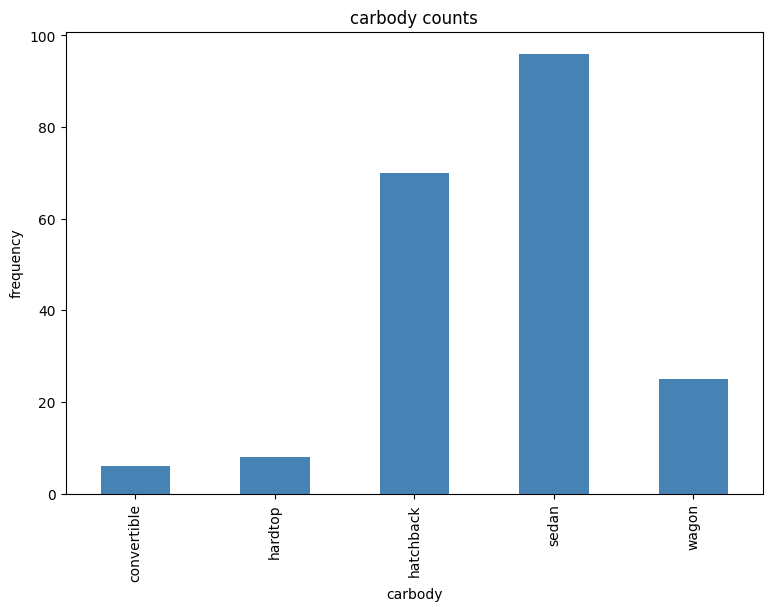

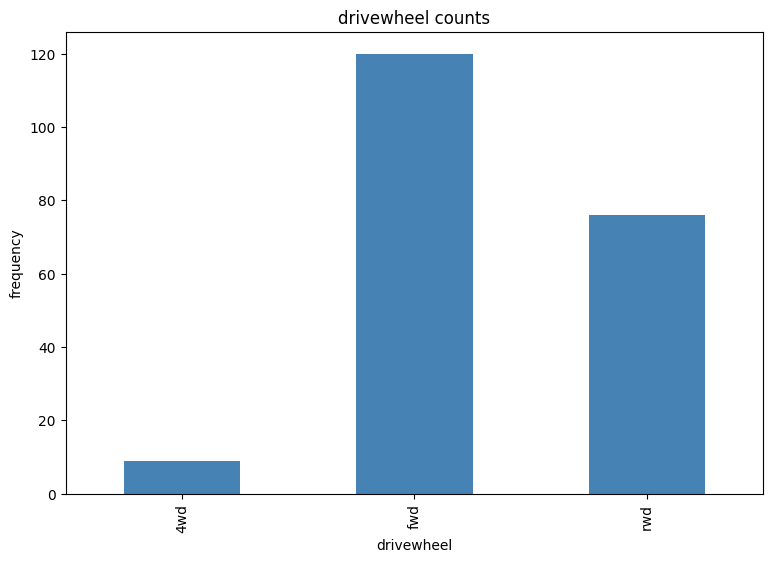

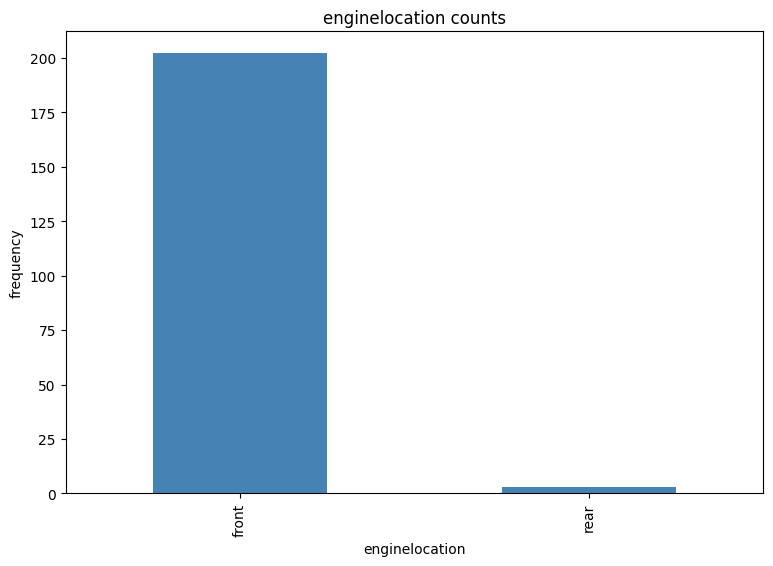

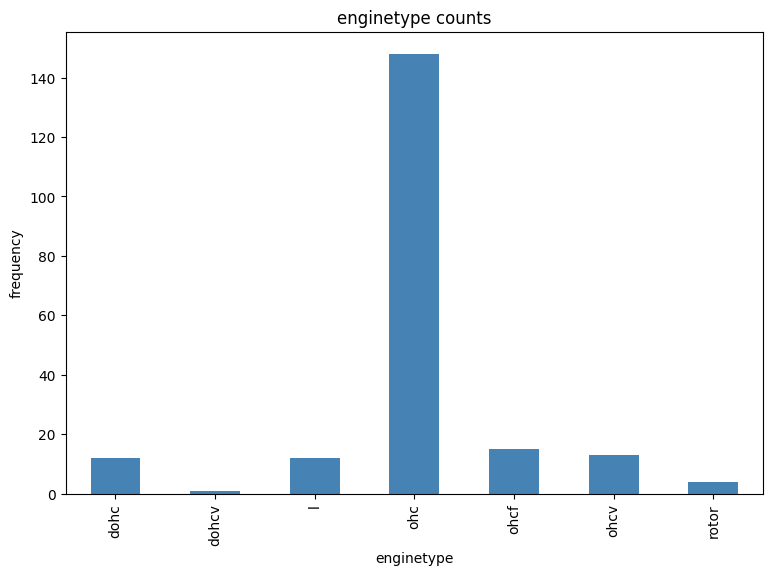

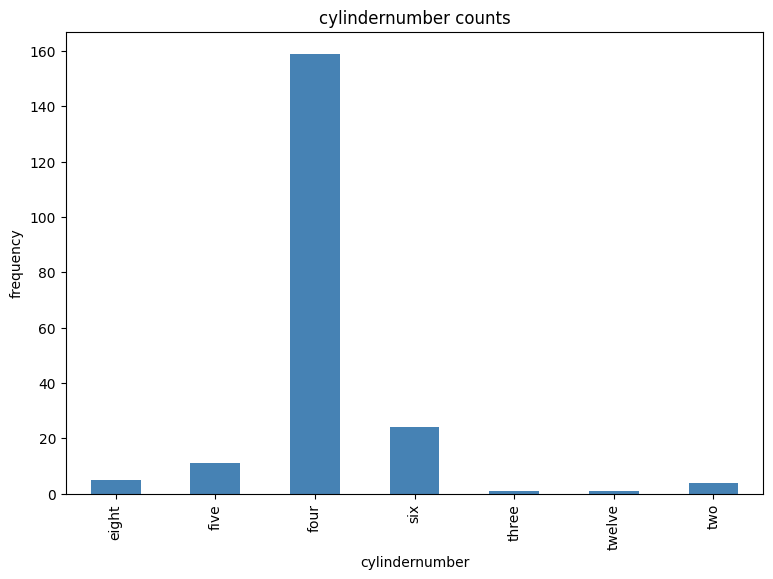

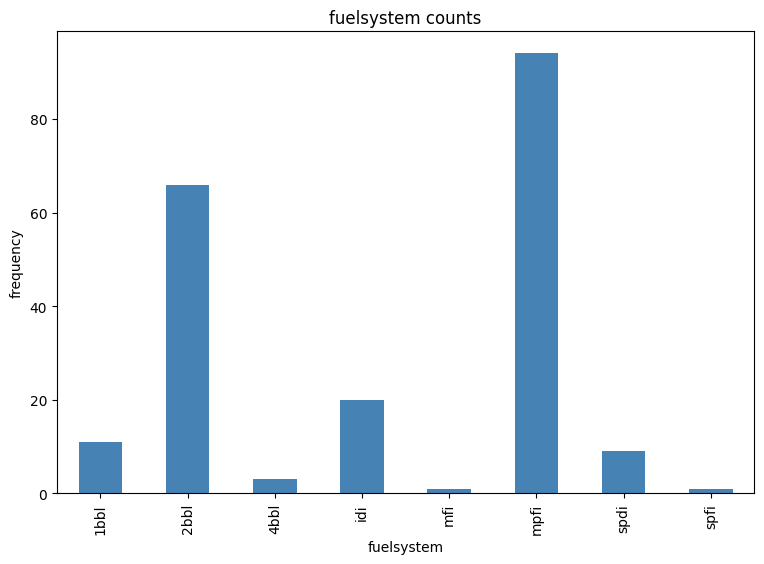

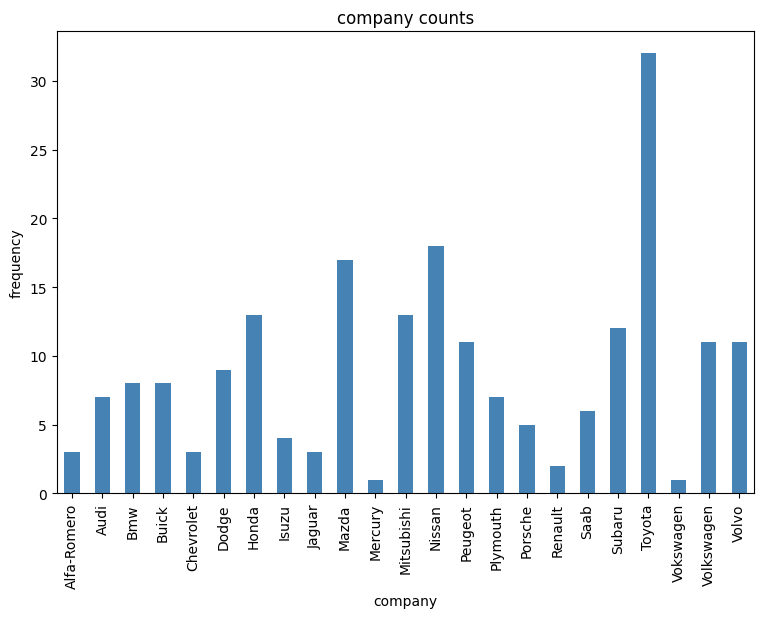

In [ ]:
for col in categorical_features[1:]:
  counts = df[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  counts.plot.bar(ax=ax, color = 'steelblue')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col)
  ax.set_ylabel('frequency')
plt.show()

In [ ]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

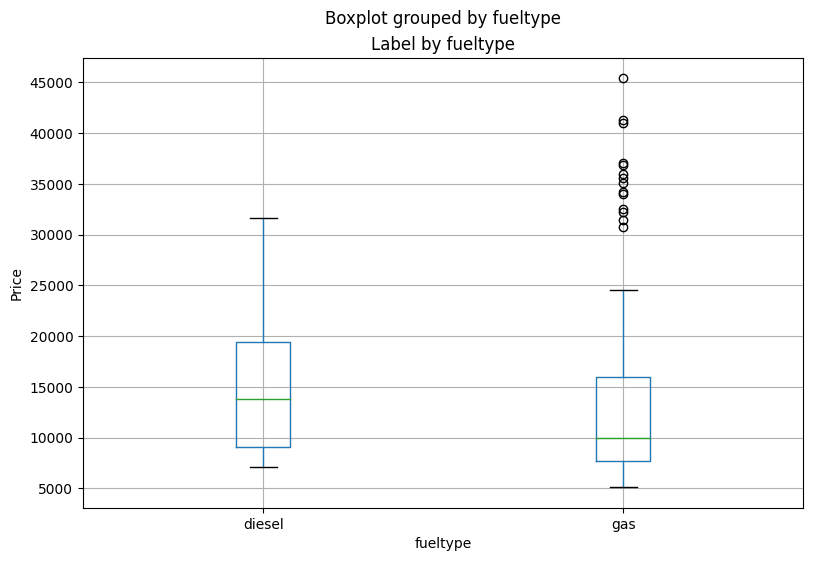

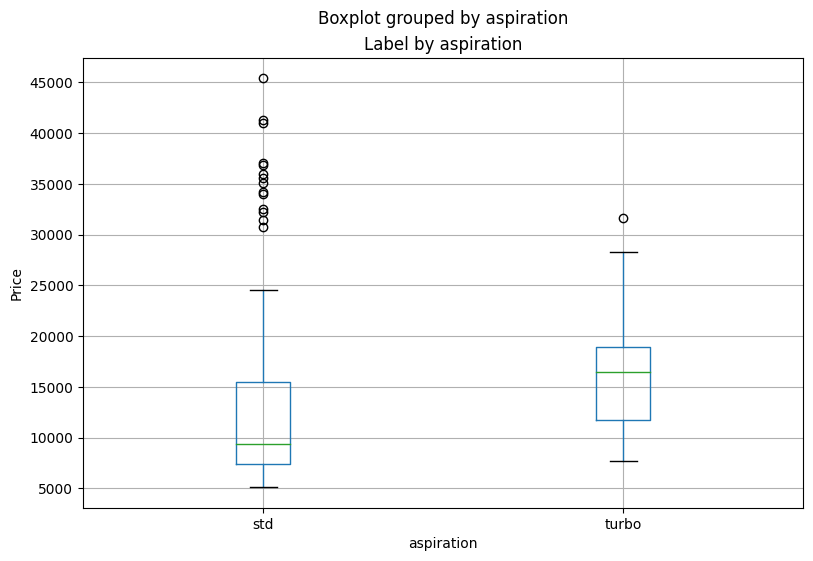

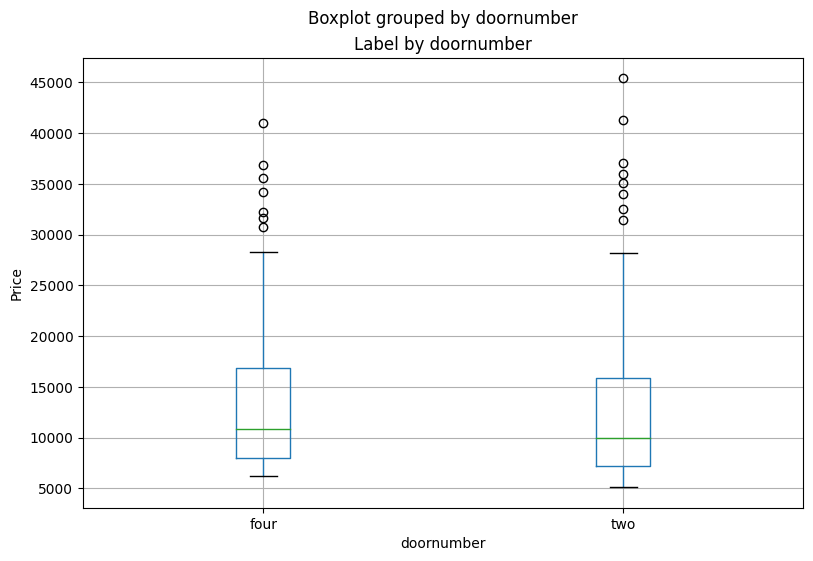

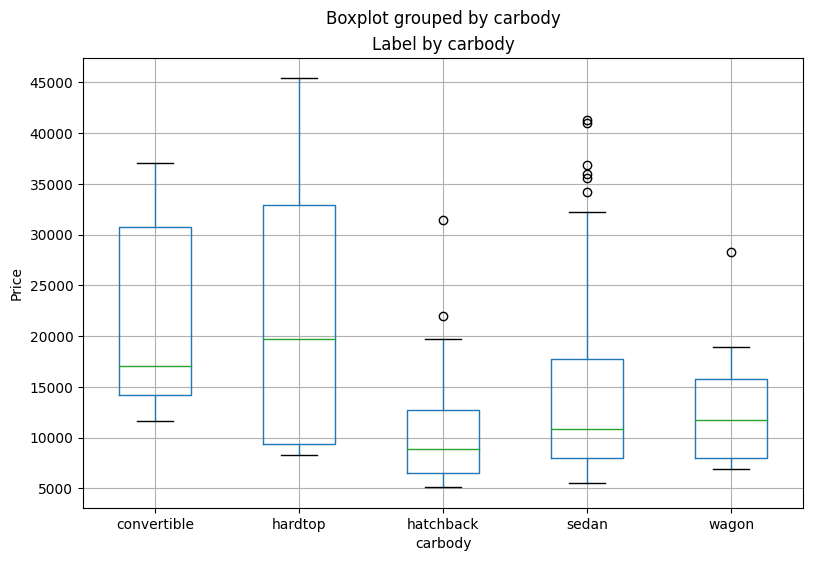

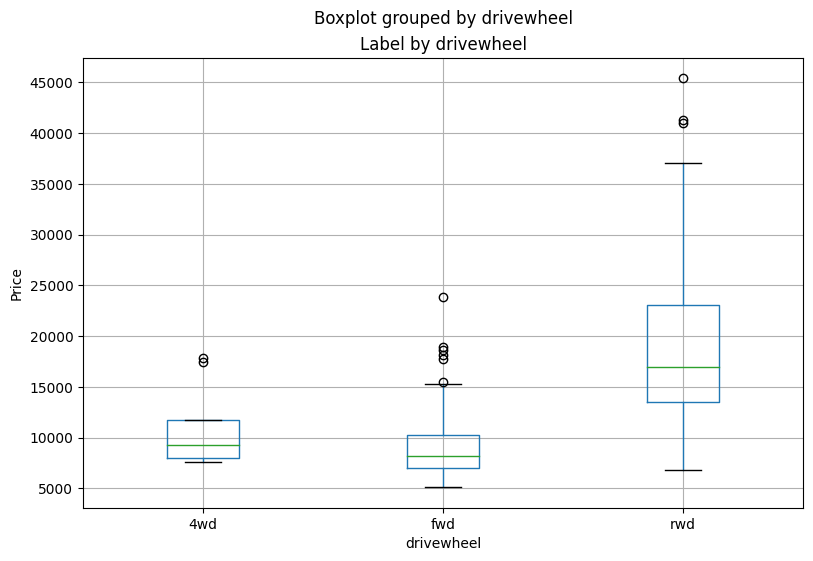

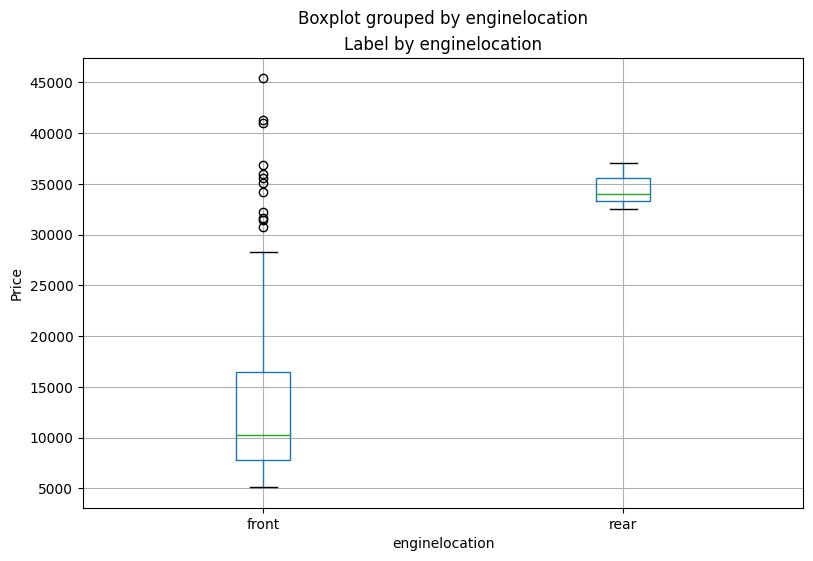

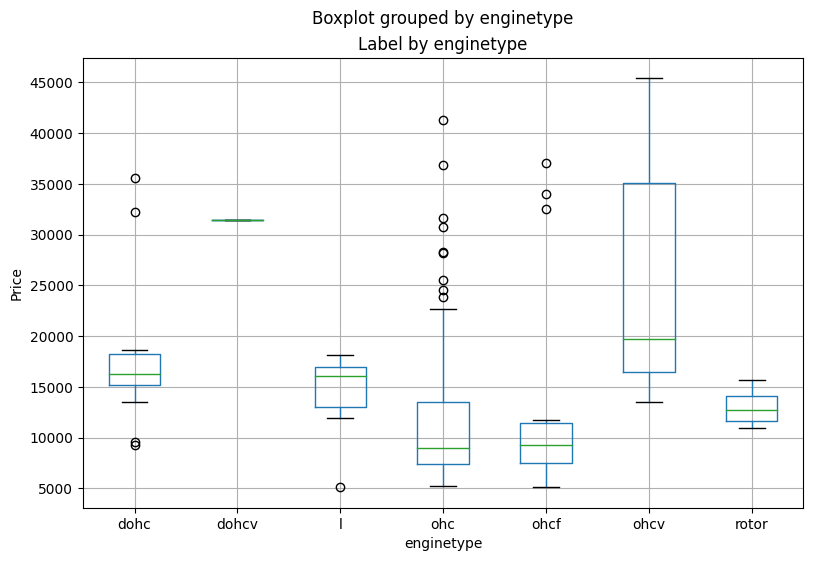

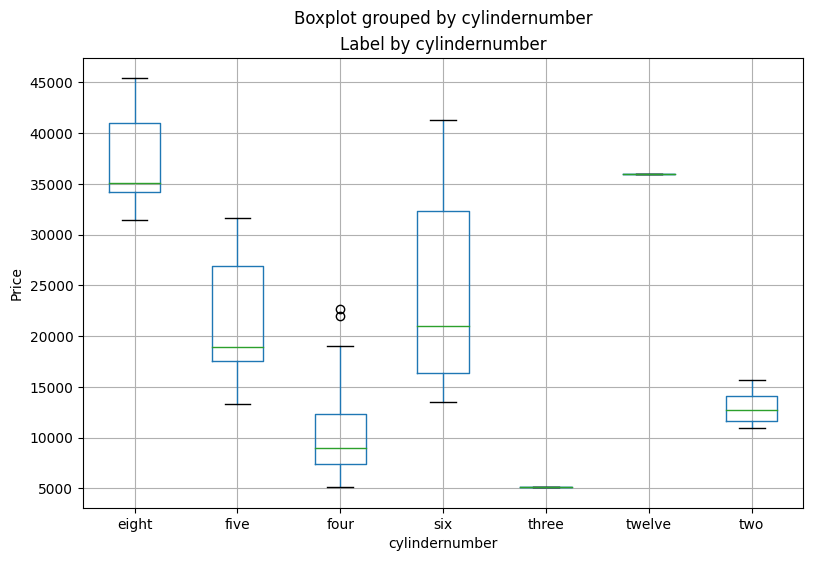

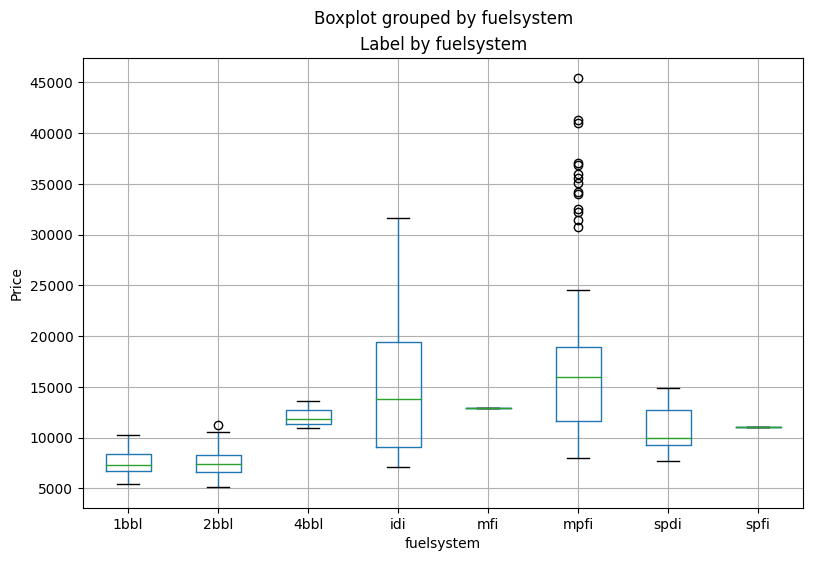

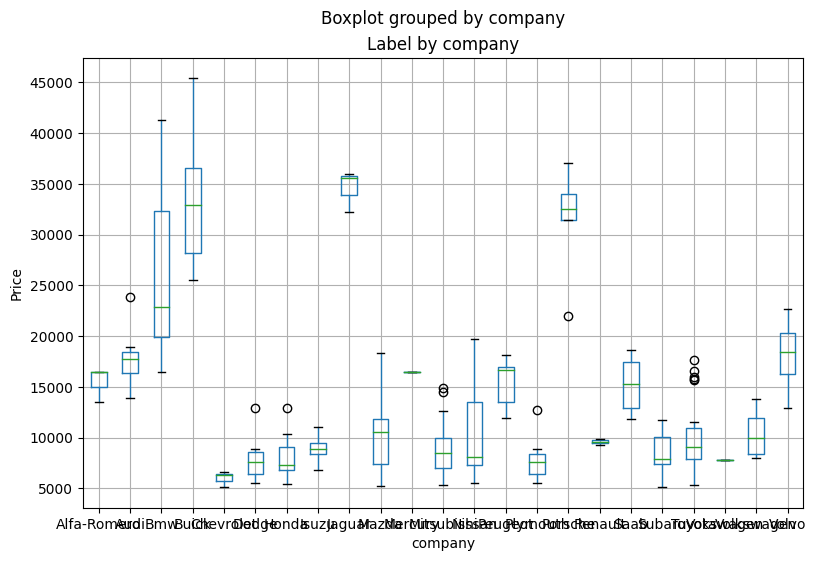

In [ ]:
for col in categorical_features[1:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  df.boxplot(column = 'price', by = col, ax = ax)
  ax.set_title('Label by '+ col)
  ax.set_ylabel('Price')


<Figure size 2000x600 with 0 Axes>

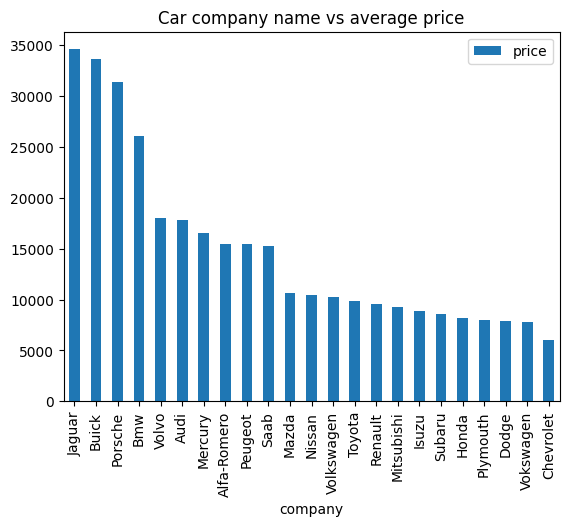

In [ ]:
plt.figure(figsize = (20,6))

df_autox = pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car company name vs average price')
plt.show()

In [ ]:
df_autox.rename(columns = {'price':'price_mean'}, inplace = True)

In [ ]:
df = df.merge(df_autox, on = 'company', how = 'left')

In [ ]:
df['company_cat'] = df['price_mean'].apply(lambda x: 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [ ]:
df['company_cat'].value_counts()

0    142
1     39
2     24
Name: company_cat, dtype: int64

In [ ]:
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [ ]:
df_pr = df.copy()

In [ ]:
### Data Encoding
encoders_nums = {'fueltype': {'diesel':1,'gas':0},
                 'aspiration': {'turbo':1, 'std':0},
                 'doornumber': {'four':4, 'two':2},
                 'drivewheel': {'fwd':0, '4wd':0, 'rwd':1},
                 'cylindernumber': {'four':4, 'six':6, 'five':5, 'eight': 8, 'two':2,'twelve':12, 'three': 3},
                 }

df_pr = df_pr.replace(encoders_nums)

In [ ]:
#one hot encoding

df_pr = pd.get_dummies(df_pr, columns = ['carbody', 'enginetype', 'fuelsystem'], prefix = ['body', 'etype', 'fsystem'])

In [ ]:
df_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
features = numerical_features.copy()
features.extend(['fueltype', 'aspiration',
       'doornumber', 'drivewheel','cylindernumber','company_cat','body_convertible','body_hardtop','body_hatchback','body_sedan', 
       'body_wagon', 'etype_dohc','etype_l', 'etype_ohc', 'etype_ohcf', 'etype_ohcv',
      'fsystem_1bbl', 'fsystem_2bbl','fsystem_idi', 'fsystem_mpfi', 'fsystem_spdi'])

In [ ]:
df_pr.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'mileage', 'car_area', 'company',
       'price_mean', 'company_cat', 'body_convertible', 'body_hardtop',
       'body_hatchback', 'body_sedan', 'body_wagon', 'etype_dohc',
       'etype_dohcv', 'etype_l', 'etype_ohc', 'etype_ohcf', 'etype_ohcv',
       'etype_rotor', 'fsystem_1bbl', 'fsystem_2bbl', 'fsystem_4bbl',
       'fsystem_idi', 'fsystem_mfi', 'fsystem_mpfi', 'fsystem_spdi',
       'fsystem_spfi'],
      dtype='object')

In [ ]:
len(features)

25

In [ ]:
features

['symboling',
 'enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [ ]:
df_pr[features]

,symboling,enginesize,compressionratio,mileage,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_cat,...,etype_dohc,etype_l,etype_ohc,etype_ohcf,etype_ohcv,fsystem_1bbl,fsystem_2bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi
0,3,130,9.0,23.4,0,0,2,1,4,1,...,1,0,0,0,0,0,0,0,1,0
1,3,130,9.0,23.4,0,0,2,1,4,1,...,1,0,0,0,0,0,0,0,1,0
2,1,152,9.0,21.8,0,0,2,1,6,1,...,0,0,0,0,1,0,0,0,1,0
3,2,109,10.0,26.4,0,0,4,0,4,1,...,0,0,1,0,0,0,0,0,1,0
4,2,136,8.0,19.6,0,0,4,0,5,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,141,9.5,25.0,0,0,4,1,4,1,...,0,0,1,0,0,0,0,0,1,0
201,-1,141,8.7,21.4,0,1,4,1,4,1,...,0,0,1,0,0,0,0,0,1,0
202,-1,173,8.8,20.0,0,0,4,1,6,1,...,0,0,0,0,1,0,0,0,1,0
203,-1,145,23.0,26.4,1,1,4,1,6,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
from scipy.stats import zscore
X = df_pr[features].apply(zscore)

In [ ]:
X

,symboling,enginesize,compressionratio,mileage,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_cat,...,etype_dohc,etype_l,etype_ohc,etype_ohcf,etype_ohcv,fsystem_1bbl,fsystem_2bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi
0,1.743470,0.074449,-0.288349,-0.609359,-0.328798,-0.469295,-1.130388,1.302831,-0.352887,0.832184,...,4.010403,-0.249351,-1.611363,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
1,1.743470,0.074449,-0.288349,-0.609359,-0.328798,-0.469295,-1.130388,1.302831,-0.352887,0.832184,...,4.010403,-0.249351,-1.611363,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
2,0.133509,0.604046,-0.288349,-0.851157,-0.328798,-0.469295,-1.130388,1.302831,1.502032,0.832184,...,-0.249351,-0.249351,-1.611363,-0.280976,3.843076,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
3,0.938490,-0.431076,-0.035973,-0.155989,-0.328798,-0.469295,0.884652,-0.767559,-0.352887,0.832184,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
4,0.938490,0.218885,-0.540725,-1.183629,-0.328798,-0.469295,0.884652,-0.767559,0.574572,0.832184,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.339248,-0.162161,-0.367562,-0.328798,-0.469295,0.884652,1.302831,-0.352887,0.832184,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
201,-1.476452,0.339248,-0.364062,-0.911606,-0.328798,2.130854,0.884652,1.302831,-0.352887,0.832184,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
202,-1.476452,1.109571,-0.338824,-1.123179,-0.328798,-0.469295,0.884652,1.302831,1.502032,0.832184,...,-0.249351,-0.249351,-1.611363,-0.280976,3.843076,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
203,-1.476452,0.435538,3.244916,-0.155989,3.041381,2.130854,0.884652,1.302831,1.502032,0.832184,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,3.041381,-0.920243,-0.214286


In [ ]:
Y = np.log10(df_pr['price'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(164, 25)
(41, 25)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.score(X_train, Y_train)

0.9329480637374895

In [ ]:
reg.coef_

array([ 0.00764374,  0.07667367,  0.01249599, -0.05600718,  0.00435055,
        0.02167724,  0.01956613,  0.01564733,  0.00098658,  0.0645828 ,
        0.01286887, -0.0004413 , -0.00017459,  0.0006832 , -0.00715647,
       -0.04023032, -0.05044783, -0.06235073, -0.03480796, -0.04298445,
        0.0016695 , -0.01416771,  0.00435055,  0.0209214 , -0.00713405])

In [ ]:
len(reg.coef_)

25

In [ ]:
reg.intercept_

4.0597647281526665

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([3.81571164, 4.13383112, 4.17663251, 3.55938478, 4.01742162,
       4.08975582, 3.78434472, 3.86995632, 4.16841079, 3.87454078,
       4.32395141, 4.56481218, 4.11245367, 4.05974486, 3.79829211,
       4.09166646, 4.03884936, 4.18666694, 3.919601  , 3.85698391,
       3.97793444, 4.13304115, 4.03323067, 4.09166646, 4.15929127,
       3.84521174, 3.87210657, 4.10980211, 3.89068285, 3.83317045,
       3.9629918 , 3.98718677, 4.32996795, 3.99685079, 3.87259698,
       4.44956138, 4.07470912, 4.17479529, 3.81512738, 4.62249834,
       3.76501864])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(10**(Y_test), 10**(y_pred))
print('MSE:' , MSE)

RMSE = np.sqrt(MSE)
print('RMSE:' , RMSE)

MSE: 8965018.873531274
RMSE: 2994.1641360371805


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(Y_test), 10**(y_pred))
print("R2:", r2)

R2: 0.8841973572587697


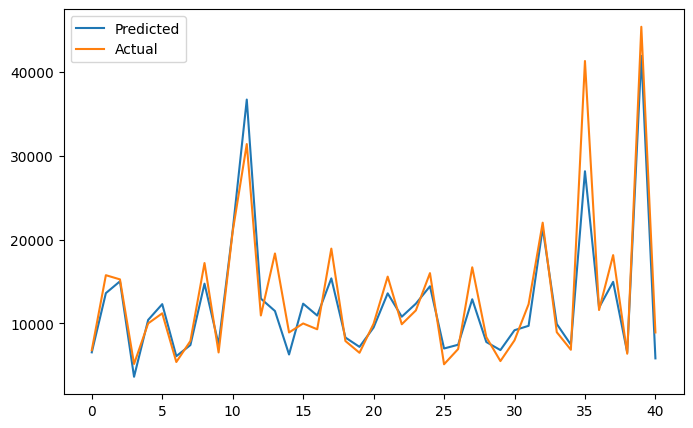

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(Y_test)))
plt.legend(['Predicted', 'Actual'])

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.0001 , max_iter = 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, Y_train)

0.9328854548375427

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alpha value is ', lasso_regressor.best_params_)
print('\nUsing ', lasso_regressor.best_params_,' the negative mean squared error is: ', lasso_regressor.best_score_)

The best fit alpha value is  {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.00496551147174629


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

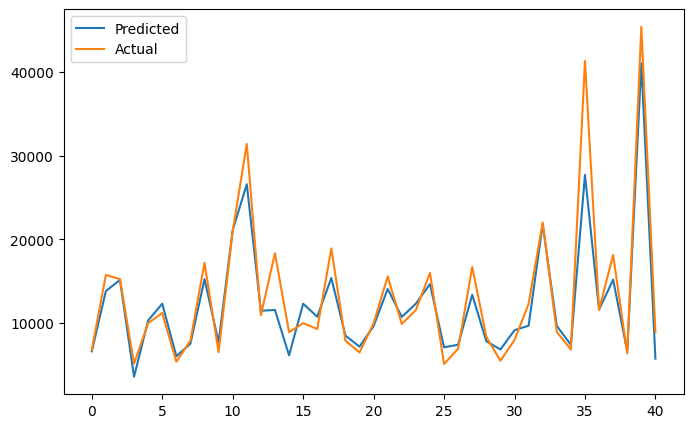

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(Y_test)))
plt.legend(['Predicted', 'Actual'])
plt.show()

In [ ]:
MSE = mean_squared_error(10**(Y_test), 10**(y_pred_lasso))
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_lasso))
print('R2 :', r2)

MSE : 8929680.317201788
RMSE : 2988.2570701333225
R2 : 0.8846538312797778


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alpha value is ', ridge_regressor.best_params_)
print('\nUsing ', ridge_regressor.best_params_,' the negative mean squared error is: ', ridge_regressor.best_score_)

The best fit alpha value is  {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.005090462383312028


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE = mean_squared_error(10**(Y_test), 10**(y_pred_ridge))
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_ridge))
print('R2 :', r2)

MSE : 8803390.585302887
RMSE : 2967.0508228378712
R2 : 0.8862851367919338


In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)